In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from sklearn.neighbors import KNeighborsRegressor
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis(EDA)

In [4]:
#finding number of rows and columns
data.shape

(907, 27)

The datadet has 907 rows and 27 columns


In [5]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Observations from the above dataset after finding out the statistics of the data:-

1.The difference between mean ad standard deviation is is found to be good only in latitude,longitude and commissioning_year. rest for every column the standard deviation is greater than the mean which may be because of high variation between values and abnormal distribution of data.

2.other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019 and estimated_generation_gwh columns have all null values.

3.capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 have min value as 0.

4.generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 columns a large difference between the quantiles.

5.year_of_capacity_data appears to be only containing date.

In [6]:
#finding the null values in each column
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

the dataset contains a lot of  null values in different columns. lets dig more into the dataset before filling these NANs.

In [12]:
# checking number of unique values in each column
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Lets delete some of the columns which have only null values

In [16]:
#deleting columns from the dataset
data.drop(columns=['estimated_generation_gwh','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019',],axis=1,inplace=True)

In [25]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [18]:
#finding the null values in each column
data.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [23]:
# checking number of unique values in each column
data.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [21]:


#no. of columns in the dataset
data.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [22]:
#checking different datatypes present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

the dataset contains a lot of columns having object datatype values. We need to convert them into numbers as machine learning model cant work with string values.

# Imputing columns having null values 


In [26]:
# filling missing values in latitude using mean
data['latitude']=data['latitude'].fillna(data['latitude'].mean())

In [27]:
# filling missing values in longitude using mean
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [28]:
#imputing other_fuel1 feature null values
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0], inplace=True)

In [30]:
#imputing commissioning_year feature null values
data['commissioning_year'].fillna(data['commissioning_year'].mode()[0], inplace=True)

In [32]:
#imputing other features null values
data['owner'].fillna(data['owner'].mode()[0], inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0], inplace=True)
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0], inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mode()[0], inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mode()[0], inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mode()[0], inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mode()[0], inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mode()[0], inplace=True)
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0], inplace=True)



In [33]:
data.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now all the null values has been treated, lets encode the catagorical features

In [35]:
data.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [37]:
#lets delete the country column as there is only one country value present here
data.drop('country',axis=1,inplace=True)

In [38]:
data.drop('country_long',axis=1,inplace=True)


In [41]:
#deleting some more columns
data.drop('name',axis=1,inplace=True)
data.drop('gppd_idnr',axis=1,inplace=True)
data.drop('owner',axis=1,inplace=True)
data.drop('source',axis=1,inplace=True)

In [46]:
data.drop('url',axis=1,inplace=True)
data.drop('year_of_capacity_data',axis=1,inplace=True)
data.drop('generation_data_source',axis=1,inplace=True)


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   commissioning_year   907 non-null    float64
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [49]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,0.000000,0.000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,Coal,Oil,2015.0,WRI,0.000000,0.000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,Wind,Oil,2015.0,WRI,0.000000,0.000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


# Encoding the catagorical values

In [51]:

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [52]:
#encoding the primary_fuel column
df2=lab_enc.fit_transform(data['primary_fuel'])
pd.Series(df2)

data['primary_fuel']=df2
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,Oil,2011.0,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,Oil,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,Oil,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,Oil,2016.0,WRI,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,Oil,2015.0,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,Oil,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,1,Oil,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000


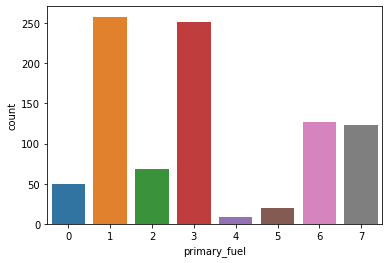

In [53]:
#lets plot the value counts for Gender
sns.countplot(x='primary_fuel', data=data, )
plt.show()

coal is the most used primary fuel

In [54]:
#encoding the other_fuel1 column
df2=lab_enc.fit_transform(data['other_fuel1'])
pd.Series(df2)

data['other_fuel1']=df2
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,2,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,2,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,WRI,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2015.0,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,2,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,1,2,2015.0,WRI,0.000000,0.000000,0.000000,0.000000,0.000000


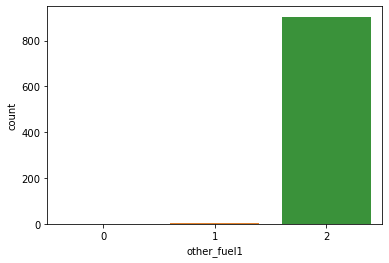

In [55]:
#lets plot the value counts for other_fuel1
sns.countplot(x='other_fuel1', data=data, )
plt.show()

Oil is the most used other fuel.

In [57]:
#encoding the geolocation_source column
df2=lab_enc.fit_transform(data['geolocation_source'])
pd.Series(df2)

data['geolocation_source']=df2
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2015.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,1,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000


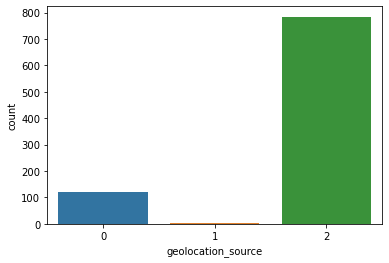

In [58]:
#lets plot the value counts for geolocation_source
sns.countplot(x='geolocation_source', data=data, )
plt.show()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   other_fuel1          907 non-null    int32  
 5   commissioning_year   907 non-null    float64
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


All columns have now numerical data we can now start the visualizing the relationships.

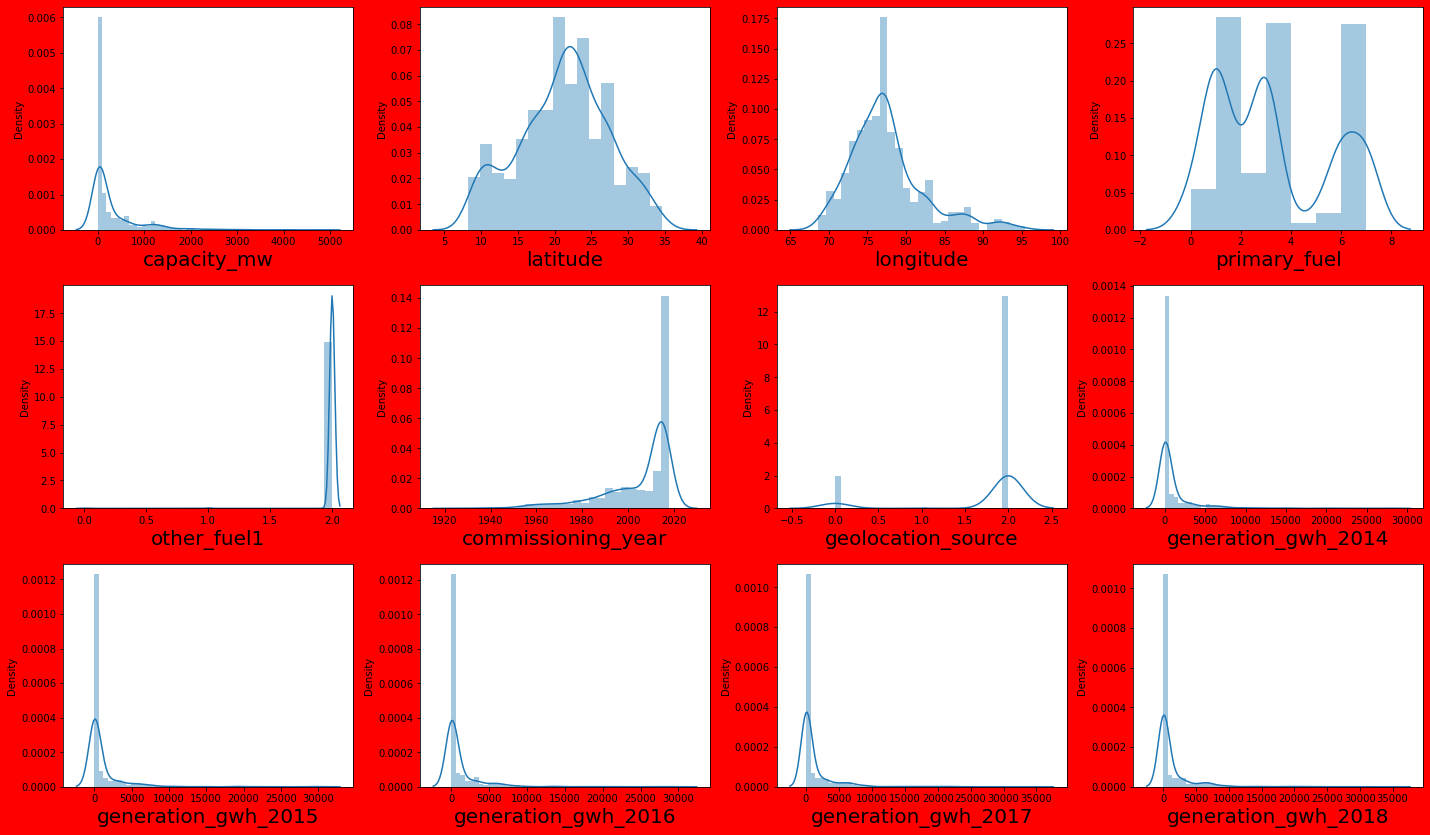

In [60]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the distplot

1.The data distribution looks decent enough for most of the features i.e. it shows normal distribution for most of the continious features(the curve is not bell shaped) except longitude, commision_year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018.

2.longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 has some skewness in right side and Commision_year shows skewness in left side.

3.We do not need to consider features like Primary fuel,other fuel and geolocation_source as they have catagorical data.

4.now lets check whether they have outliers in the distribution by plotting box plots.

# Prediction of Primary Fuel 

In [61]:
#checking for outliers in all the features
df_features=data.drop('primary_fuel', axis=1)

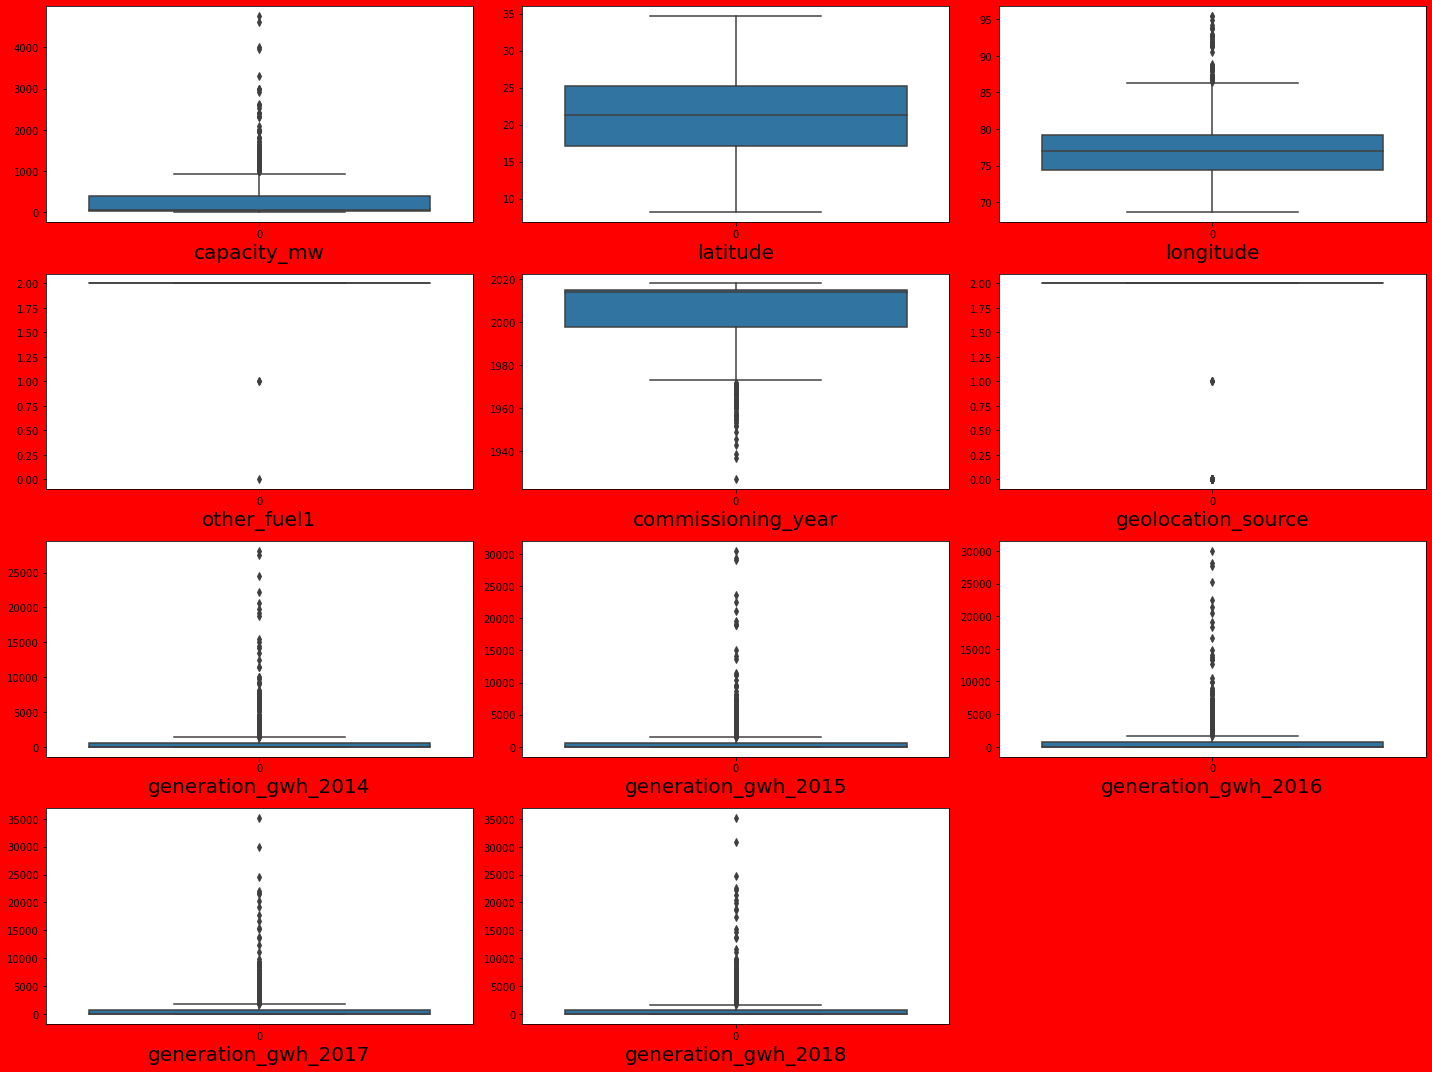

In [62]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=11:
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the box plot

1.only latitude does not have any outliers, rest all the features have outliers.


In [72]:
#assigning our datset to a new variable for testing the feasibility after removing the outliers
df=data

In [73]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

capacity_mw            314.00000
latitude                 8.20740
longitude                4.65620
primary_fuel             5.00000
other_fuel1              0.00000
commissioning_year      15.00000
geolocation_source       0.00000
generation_gwh_2014    452.52700
generation_gwh_2015    500.01735
generation_gwh_2016    509.00000
generation_gwh_2017    553.61500
generation_gwh_2018    586.47290
dtype: float64

In [74]:
#removing the outliers for longitude
lo_high=q3.longitude + (1.5 * iqr.longitude)


index=np.where(df['longitude'] > lo_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(797, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,0.000,0.000000,0.00000,0.000000,0.000
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,0.000,0.000000,0.00000,0.000000,0.000
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,0.000,0.000000,0.00000,0.000000,0.000
3,4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550,5916.370000,6243.00000,5385.579736,7279.000
4,5,250.0,23.7689,68.6447,1,2,2005.0,2,1153.421,1208.852000,1175.76500,1147.913000,976.655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.000,0.994875,233.59665,865.400000,686.500
793,903,3.0,12.8932,78.1654,6,2,2015.0,0,0.000,0.000000,0.00000,0.000000,0.000
794,904,25.5,15.2758,75.5811,7,2,2015.0,2,0.000,0.000000,0.00000,0.000000,0.000
795,905,80.0,24.3500,73.7477,1,2,2015.0,2,0.000,0.000000,0.00000,0.000000,0.000


In [75]:
#removing the outliers for generation_gwh_2014
g2014_high=q3.generation_gwh_2014 + (1.5 * iqr.generation_gwh_2014)


index=np.where(df['generation_gwh_2014'] > g2014_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(662, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
3,6,60.0,10.4547,77.0078,3,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
4,7,192.0,32.2258,77.2070,3,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
658,903,3.0,12.8932,78.1654,6,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
659,904,25.5,15.2758,75.5811,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
660,905,80.0,24.3500,73.7477,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [76]:
#removing the outliers for generation_gwh_2015
g2015_high=q3.generation_gwh_2015 + (1.5 * iqr.generation_gwh_2015)


index=np.where(df['generation_gwh_2015'] > g2015_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(650, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
3,6,60.0,10.4547,77.0078,3,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
4,7,192.0,32.2258,77.2070,3,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
646,903,3.0,12.8932,78.1654,6,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
647,904,25.5,15.2758,75.5811,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
648,905,80.0,24.3500,73.7477,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [77]:
#removing the outliers for generation_gwh_2016
g2016_high=q3.generation_gwh_2016 + (1.5 * iqr.generation_gwh_2016)


index=np.where(df['generation_gwh_2016'] > g2016_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(634, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
3,6,60.0,10.4547,77.0078,3,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
4,7,192.0,32.2258,77.2070,3,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
630,903,3.0,12.8932,78.1654,6,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
631,904,25.5,15.2758,75.5811,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
632,905,80.0,24.3500,73.7477,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [78]:
#removing the outliers for generation_gwh_2017
g2017_high=q3.generation_gwh_2017 + (1.5 * iqr.generation_gwh_2017)


index=np.where(df['generation_gwh_2017'] > g2017_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(629, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
3,6,60.0,10.4547,77.0078,3,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
4,7,192.0,32.2258,77.2070,3,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
625,903,3.0,12.8932,78.1654,6,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
626,904,25.5,15.2758,75.5811,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
627,905,80.0,24.3500,73.7477,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [79]:
#removing the outliers for generation_gwh_2018
g2018_high=q3.generation_gwh_2018 + (1.5 * iqr.generation_gwh_2018)


index=np.where(df['generation_gwh_2018'] > g2018_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(625, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
3,6,60.0,10.4547,77.0078,3,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
4,7,192.0,32.2258,77.2070,3,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
621,903,3.0,12.8932,78.1654,6,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
622,904,25.5,15.2758,75.5811,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
623,905,80.0,24.3500,73.7477,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [ ]:
#removing the outliers for ApplicantIncome
ai_high=q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome)


index=np.where(df['ApplicantIncome'] > ai_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

In [80]:
data=df

In [81]:
data.shape


(625, 12)

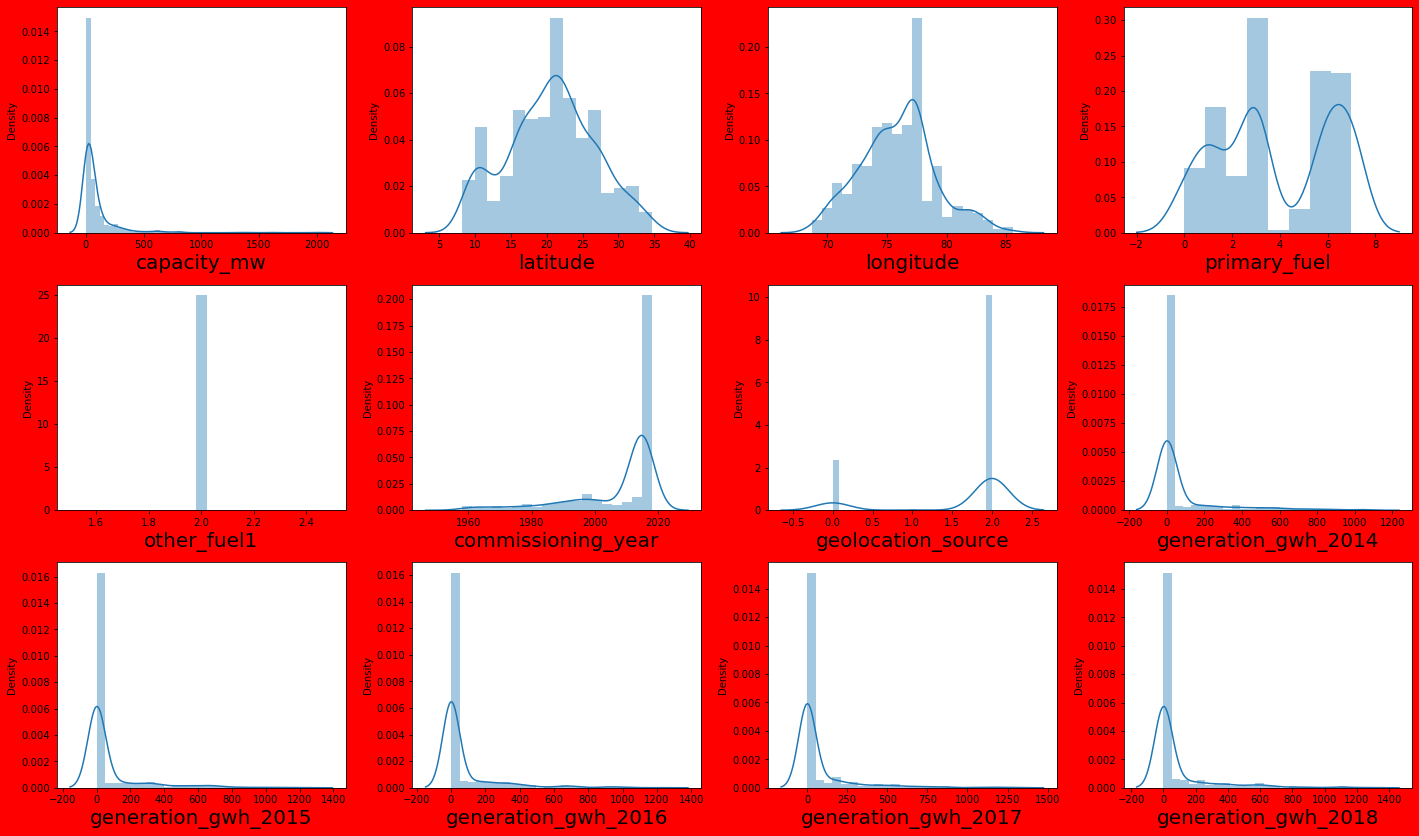

In [83]:
#checking the distribution after removing the outliers
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

now the distribution is looking somewhat better as compared to before when outliers were not removed.

In [84]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['primary_fuel']
x=data.drop(columns=['primary_fuel'])

In [85]:
x

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,98.0,24.7663,74.6090,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,39.2,21.9038,69.3732,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
6,60.0,10.4547,77.0078,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
7,192.0,32.2258,77.2070,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
903,3.0,12.8932,78.1654,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
904,25.5,15.2758,75.5811,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
905,80.0,24.3500,73.7477,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [86]:
y

0      6
1      1
2      7
6      3
7      3
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 625, dtype: int32

In [87]:
#finding the corelation between the features in the data set
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.037470,0.197210,-0.225135,NaN,-0.064571,0.183625,0.286227,0.340678,0.324308,0.369952,0.376838
latitude,-0.037470,1.000000,-0.196210,0.044907,NaN,0.049111,-0.284143,0.075019,0.106109,0.135280,0.114396,0.070008
longitude,0.197210,-0.196210,1.000000,-0.357500,NaN,-0.209856,0.278957,0.249134,0.218423,0.264683,0.257709,0.255470
primary_fuel,-0.225135,0.044907,-0.357500,1.000000,NaN,0.201355,-0.440037,-0.194102,-0.200292,-0.204713,-0.202905,-0.211839
other_fuel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,-0.064571,0.049111,-0.209856,0.201355,NaN,1.000000,-0.275387,-0.479416,-0.407806,-0.380506,-0.369005,-0.372939
geolocation_source,0.183625,-0.284143,0.278957,-0.440037,NaN,-0.275387,1.000000,0.199943,0.192178,0.192453,0.188389,0.197456
generation_gwh_2014,0.286227,0.075019,0.249134,-0.194102,NaN,-0.479416,0.199943,1.000000,0.820809,0.866987,0.806286,0.796136
generation_gwh_2015,0.340678,0.106109,0.218423,-0.200292,NaN,-0.407806,0.192178,0.820809,1.000000,0.863981,0.810379,0.778371
generation_gwh_2016,0.324308,0.135280,0.264683,-0.204713,NaN,-0.380506,0.192453,0.866987,0.863981,1.000000,0.899025,0.848365


In [89]:
#sorting the correlation values of Loan_Status with all the columns
data.corr()['primary_fuel'].sort_values()

geolocation_source    -0.440037
longitude             -0.357500
capacity_mw           -0.225135
generation_gwh_2018   -0.211839
generation_gwh_2016   -0.204713
generation_gwh_2017   -0.202905
generation_gwh_2015   -0.200292
generation_gwh_2014   -0.194102
latitude               0.044907
commissioning_year     0.201355
primary_fuel           1.000000
other_fuel1                 NaN
Name: primary_fuel, dtype: float64

commissioning_year is weakly corelated with the label(Primary_fuel).
To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

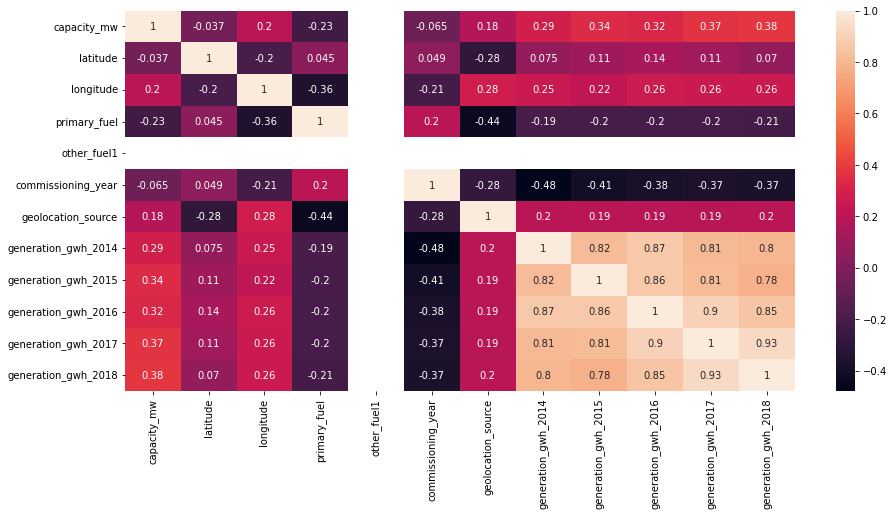

In [90]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

It seems like the most of features have not very much correlation with the label(Primary_fuel) except Commision_year. also we can observe that some features have correlation among them. We will find more about it after finding outt he VIF scores for each feature. 

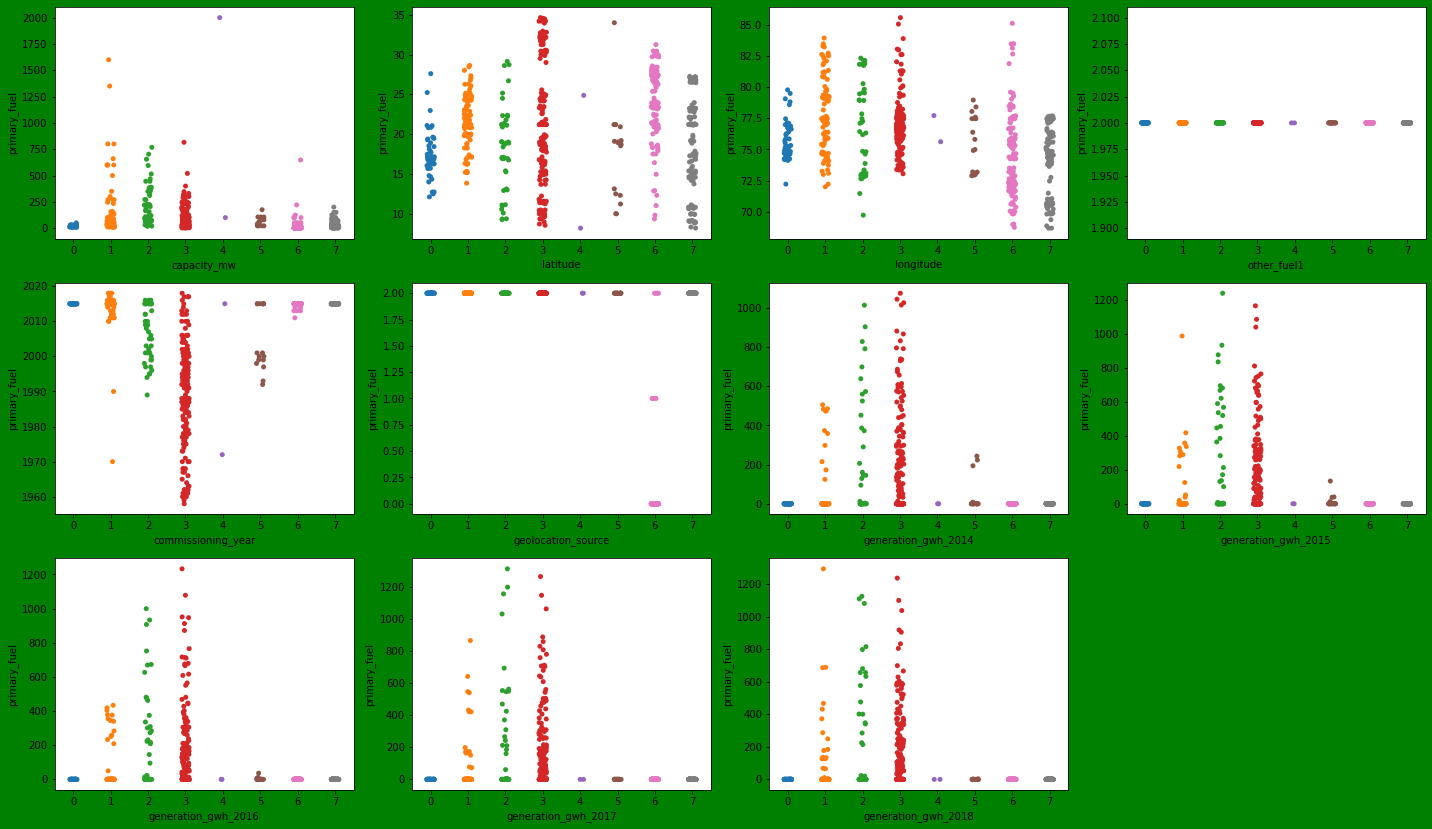

In [91]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('primary_fuel',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

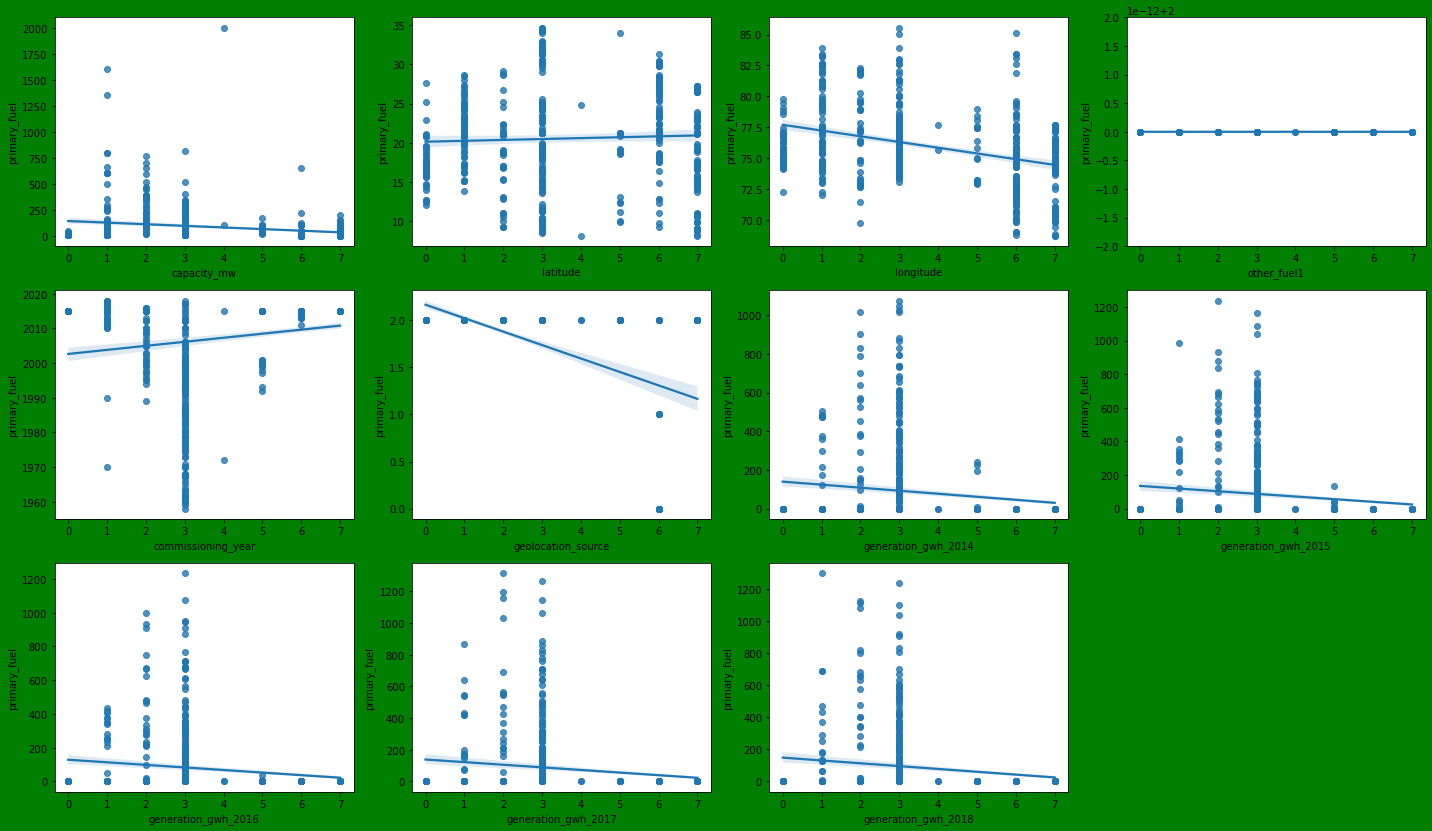

In [92]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('primary_fuel',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [93]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [94]:
x_scaled.shape[1]

11

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [95]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

,VIF,Features
0,1.235021,capacity_mw
1,1.185364,latitude
2,1.201268,longitude
3,NaN,other_fuel1
4,1.408777,commissioning_year
5,1.252929,geolocation_source
6,4.993494,generation_gwh_2014
7,4.474413,generation_gwh_2015
8,8.861455,generation_gwh_2016
9,10.707289,generation_gwh_2017


All the features have vif scores less than 10 except generation_gwh_2017. but the vif score for generation_gwh_2017 is 10.7 only so i think it will not bother the model much. rest features have moderate to low multicolinearity.

Now as the label has  catagorical data  so this is a Classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

# Building classification models for Primary fuel

In [164]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


241    6
758    6
757    7
773    7
425    5
Name: primary_fuel, dtype: int32

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [181]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier() 
rfc=RandomForestClassifier()   
svm=SVC()                 

In [182]:
models = [lr, knn, dtc, svm, rfc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print (accuracy_score(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print (classification_report(y_test, y_pred))

LogisticRegression()
0.6687898089171974
[[ 0  0  0  0  0  0 11]
 [ 0 14  0  1  0  0  8]
 [ 0  4  2  6  0  0  1]
 [ 0  6  4 33  0  0  0]
 [ 0  0  0  3  0  0  2]
 [ 0  1  0  0  0 26  0]
 [ 0  5  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.47      0.61      0.53        23
           2       0.33      0.15      0.21        13
           3       0.77      0.77      0.77        43
           5       0.00      0.00      0.00         5
           6       1.00      0.96      0.98        27
           7       0.58      0.86      0.69        35

    accuracy                           0.67       157
   macro avg       0.45      0.48      0.45       157
weighted avg       0.61      0.67      0.63       157

KNeighborsClassifier()
0.7579617834394905
[[ 8  0  0  0  0  0  3]
 [ 1 18  1  1  0  0  2]
 [ 1  2  3  7  0  0  0]
 [ 0  5  1 35  2  0  0]
 [ 0  0  2  3  0  0  0]
 [ 0  0  0  0  0 26  1]
 [ 3  2 

Here we can see that RandaomForestClassifier() gives the best accuracy score. we have also checked the f1 score and we found out that RandaomForestClassifier() has thee best f1 score among all the models.

In [183]:
# Cross validation scores for all models

for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')


Cross Validation Score for  LogisticRegression()  is : 0.6993087557603687
 
Cross Validation Score for  KNeighborsClassifier()  is : 0.789042498719918
 
Cross Validation Score for  DecisionTreeClassifier()  is : 0.8113159242191499
 
Cross Validation Score for  SVC()  is : 0.7312852022529442
 
Cross Validation Score for  RandomForestClassifier()  is : 0.8464413722478238
 


We have concluded that the RandomForestClassifier() is the best model based on the accuracy  and Cross validation  scores of all the models. So now lets use RandomForestClassifier() for further evaluation and lets check whether we can improve the accuracy of the model by using Hyperparameter tuning using GridSearchCV.

In [184]:
#performing hyperparameter tuning for Random Forest Classifier method
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[20,40,60,80,100,150],'criterion' :['gini', 'entropy']}

In [185]:
gridsearch=GridSearchCV(estimator= rfc , param_grid=param_grid )

In [186]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [20, 40, 60, 80, 100, 150]})

In [187]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 80}

In [188]:
rfc=RandomForestClassifier(max_features='sqrt', min_samples_leaf=1,n_estimators=80,criterion='entropy')

In [189]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=80)

In [190]:
data.tail()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.0,0.994875,233.59665,865.4,686.5
903,3.0,12.8932,78.1654,6,2,2015.0,0,0.0,0.000000,0.00000,0.0,0.0
904,25.5,15.2758,75.5811,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0
905,80.0,24.3500,73.7477,1,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0
906,16.5,9.9344,77.4768,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0


In [192]:
#prediction of Loan_status 
print('Primary fuel  is ', rfc.predict(scalar.transform([[16.5,9.9344,77.4768,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0]])))

Primary fuel  is  [7]


In [193]:
y_pred=rfc.predict(x_test)
y_pred

array([7, 0, 3, 6, 3, 3, 2, 6, 5, 1, 5, 7, 2, 1, 3, 3, 1, 2, 3, 7, 1, 3,
       1, 0, 7, 7, 1, 0, 1, 7, 1, 3, 3, 3, 1, 3, 6, 0, 1, 0, 3, 1, 1, 2,
       6, 1, 1, 6, 7, 2, 3, 6, 7, 1, 7, 3, 1, 1, 7, 6, 7, 1, 3, 7, 6, 6,
       3, 3, 7, 0, 6, 3, 7, 0, 7, 3, 6, 5, 6, 3, 7, 3, 7, 1, 3, 7, 7, 0,
       6, 1, 7, 3, 6, 7, 3, 3, 6, 1, 3, 6, 7, 7, 7, 6, 3, 3, 3, 7, 1, 3,
       0, 1, 6, 7, 7, 1, 3, 6, 7, 3, 6, 3, 1, 1, 7, 2, 7, 3, 3, 3, 1, 6,
       3, 3, 0, 6, 1, 6, 5, 6, 3, 7, 3, 0, 1, 3, 3, 3, 6, 7, 3, 3, 6, 7,
       7, 1, 6])

In [194]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 9,  1,  0,  0,  0,  0,  1],
       [ 1, 19,  1,  1,  0,  0,  1],
       [ 1,  5,  4,  2,  1,  0,  0],
       [ 0,  2,  0, 40,  1,  0,  0],
       [ 0,  0,  1,  2,  2,  0,  0],
       [ 0,  1,  0,  0,  0, 26,  0],
       [ 0,  2,  0,  0,  0,  1, 32]], dtype=int64)

In [195]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.63      0.83      0.72        23
           2       0.67      0.31      0.42        13
           3       0.89      0.93      0.91        43
           5       0.50      0.40      0.44         5
           6       0.96      0.96      0.96        27
           7       0.94      0.91      0.93        35

    accuracy                           0.84       157
   macro avg       0.77      0.74      0.74       157
weighted avg       0.84      0.84      0.83       157



In [196]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.84126984, 0.76190476, 0.79365079, 0.88888889, 0.82539683,
       0.91935484, 0.77419355, 0.83870968, 0.82258065, 0.88709677])

In [197]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=10).mean()

0.8368663594470046

In [269]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle'
pickle.dump(rfc,open('finalized_model.pickle','wb'))

# Building regression models for predicting the capacity_mw  and selecting the best model among them

In [198]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['capacity_mw']
x=data.drop(columns=['capacity_mw'])

In [199]:
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6,2,2011.0,1,0.00000,0.000000,0.00000,0.00000,0.00000
1,24.7663,74.6090,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
2,21.9038,69.3732,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
6,10.4547,77.0078,3,2,1970.0,2,157.55825,152.195200,61.42135,89.62960,48.32715
7,32.2258,77.2070,3,2,2010.0,2,674.39110,721.335200,675.72440,679.59495,579.31885
...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2,2016.0,2,0.00000,0.994875,233.59665,865.40000,686.50000
903,12.8932,78.1654,6,2,2015.0,0,0.00000,0.000000,0.00000,0.00000,0.00000
904,15.2758,75.5811,7,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000
905,24.3500,73.7477,1,2,2015.0,2,0.00000,0.000000,0.00000,0.00000,0.00000


In [200]:
y

0         2.5
1        98.0
2        39.2
6        60.0
7       192.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 625, dtype: float64

In [201]:
#finding the corelation between the features in the data set
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.037470,0.197210,-0.225135,NaN,-0.064571,0.183625,0.286227,0.340678,0.324308,0.369952,0.376838
latitude,-0.037470,1.000000,-0.196210,0.044907,NaN,0.049111,-0.284143,0.075019,0.106109,0.135280,0.114396,0.070008
longitude,0.197210,-0.196210,1.000000,-0.357500,NaN,-0.209856,0.278957,0.249134,0.218423,0.264683,0.257709,0.255470
primary_fuel,-0.225135,0.044907,-0.357500,1.000000,NaN,0.201355,-0.440037,-0.194102,-0.200292,-0.204713,-0.202905,-0.211839
other_fuel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,-0.064571,0.049111,-0.209856,0.201355,NaN,1.000000,-0.275387,-0.479416,-0.407806,-0.380506,-0.369005,-0.372939
geolocation_source,0.183625,-0.284143,0.278957,-0.440037,NaN,-0.275387,1.000000,0.199943,0.192178,0.192453,0.188389,0.197456
generation_gwh_2014,0.286227,0.075019,0.249134,-0.194102,NaN,-0.479416,0.199943,1.000000,0.820809,0.866987,0.806286,0.796136
generation_gwh_2015,0.340678,0.106109,0.218423,-0.200292,NaN,-0.407806,0.192178,0.820809,1.000000,0.863981,0.810379,0.778371
generation_gwh_2016,0.324308,0.135280,0.264683,-0.204713,NaN,-0.380506,0.192453,0.866987,0.863981,1.000000,0.899025,0.848365


In [203]:
#sorting the correlation values of Loan_Status with all the columns
data.corr()['capacity_mw'].sort_values()

primary_fuel          -0.225135
commissioning_year    -0.064571
latitude              -0.037470
geolocation_source     0.183625
longitude              0.197210
generation_gwh_2014    0.286227
generation_gwh_2016    0.324308
generation_gwh_2015    0.340678
generation_gwh_2017    0.369952
generation_gwh_2018    0.376838
capacity_mw            1.000000
other_fuel1                 NaN
Name: capacity_mw, dtype: float64

To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

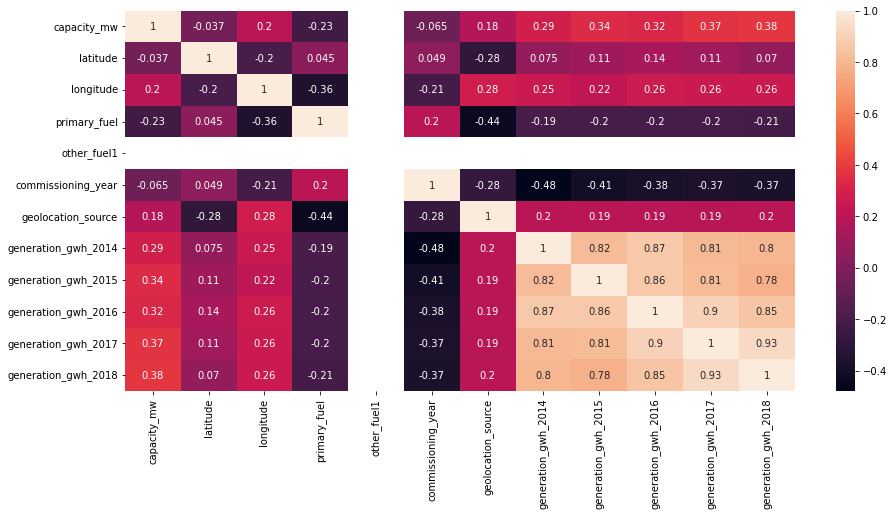

In [204]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

It seems like the most of features have not very much strong correlation with the label(capacity_mw ). also we can observe that some features have correlation among them. We will find more about it after finding outt he VIF scores for each feature. 

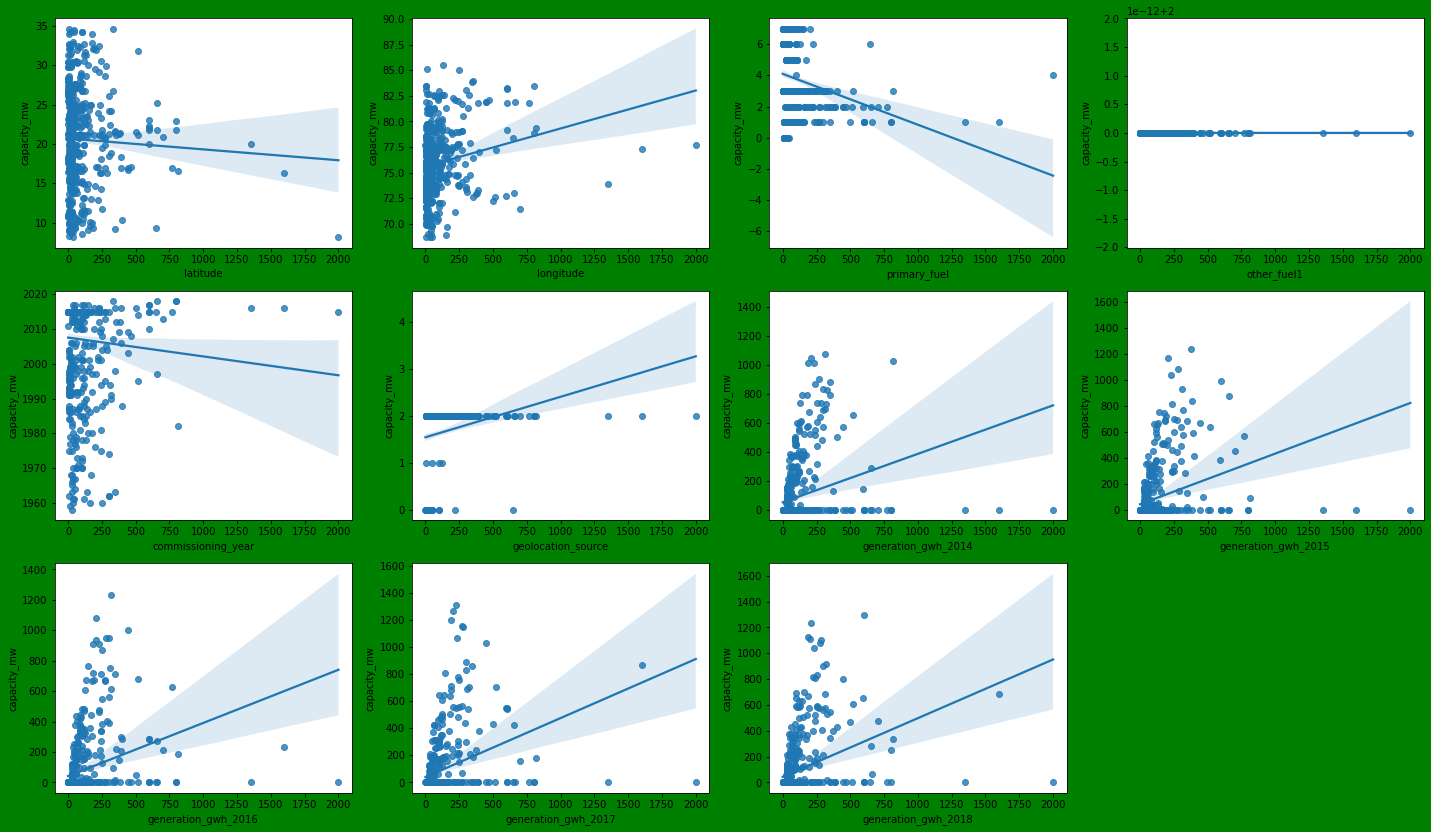

In [207]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('capacity_mw',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [209]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [210]:
x_scaled.shape[1]

11

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [211]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

,VIF,Features
0,1.202170,latitude
1,1.280435,longitude
2,1.373928,primary_fuel
3,NaN,other_fuel1
4,1.386394,commissioning_year
5,1.439271,geolocation_source
6,4.990700,generation_gwh_2014
7,4.415854,generation_gwh_2015
8,8.829536,generation_gwh_2016
9,10.671437,generation_gwh_2017


In [213]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


241      3.0
758     10.0
757    100.0
773      3.0
425     40.0
Name: capacity_mw, dtype: float64

# Linear regression model

In [214]:
# prediction through the linear regression algorithm
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [215]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.20042404296407745

In [216]:
#lets check how well the model fits the testing data
regression.score(x_test, y_test)

0.10940040478055624

In [217]:
#plotting the predicted value of y with the actual value of y
y_pred=regression.predict(x_test)
y_pred

array([ 16.22358194, 115.41180844, -19.48313539,  23.65970874,
        59.4961483 , 156.63069981,  95.40506533,   7.57926834,
        39.04975672, 268.39076598,  59.30399879,  11.5856304 ,
       258.93065959, 115.67636336, 191.89506755,  39.5788595 ,
        96.41475126, 427.50020073,  55.4083544 ,  21.09879992,
        45.71589765,  96.6916614 , 135.89636318, 114.2245622 ,
        22.14191141,  81.10195795,  58.28544849, 118.22969326,
        88.22856556,  81.02830268, 111.23044955,  53.82080779,
        39.95382456,  32.87399285,  44.05831159,  92.82878769,
         9.1493778 , 117.87545026,  94.70142154, 113.67366472,
       108.89884831, 102.53767514,  78.39074892, 500.52421425,
        68.95193673, 112.41829309,  84.01373534,  32.90687022,
        40.97469463, 305.49025163,  91.15799986,  34.41643995,
        49.4379456 ,  86.18635032,  41.60671821,  10.99274881,
       184.69316298, 110.1702613 ,  12.751486  ,  14.72605038,
        11.35195028,  90.96446346,   9.92987183,  86.22

In [218]:
#now lets use some more model evaluation techniques on linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [219]:

mean_absolute_error(y_test,y_pred)

71.93766062327

In [220]:
mean_squared_error(y_test,y_pred)

16634.555353783064

In [221]:
np.sqrt(mean_squared_error(y_test,y_pred))

128.97501833216796

# K Nearest Neighbours model

In [222]:
#Training the model

knn=KNeighborsRegressor()
knn.fit(x_train, y_train)




KNeighborsRegressor()

In [223]:
#how well the model fits the training data
knn.score(x_train, y_train)

0.4532308341125907

In [224]:
#lets check how well the model fits the testing data
knn.score(x_test, y_test)

0.3661091827824299

In [225]:
#plotting the predicted value of y with the actual value of y
y_pred=knn.predict(x_test)
y_pred


array([ 31.56  ,  53.2   , 250.3   ,  12.24  ,  48.63  , 138.    ,
       352.72  ,   5.    ,  73.72  , 298.44  ,  37.62  ,  24.82  ,
       307.5948,  40.7   ,  80.176 ,   9.8   ,  90.    , 313.7948,
        62.28  ,  28.51  ,  52.96  , 122.    , 286.56  ,  23.84  ,
        28.51  ,   7.34  ,  54.8   ,  17.9   ,  83.8   ,   7.34  ,
        97.96  ,  10.    , 123.24  ,   8.6   ,  46.5   ,  91.44  ,
        17.4   ,  19.24  ,  25.294 ,  22.74  , 104.4   , 344.    ,
       116.14  , 471.74  ,   5.36  , 188.6   ,  77.14  ,  25.4   ,
        28.34  , 141.2   ,  15.2   ,  22.2   ,  32.    ,  43.11  ,
        28.34  ,  39.05  , 169.6   ,  17.332 ,  31.56  ,   7.66  ,
        24.82  ,  47.84  ,  13.1   ,  37.83  , 140.8   ,   7.8   ,
        35.    , 115.8   ,  32.    ,  21.6   ,  13.58  ,  92.4   ,
        12.25  ,  23.9   ,   7.34  ,  52.6   ,  16.3   ,  52.6   ,
        11.6   , 279.1948,  61.8   ,  34.288 ,  38.28  ,  53.2   ,
        11.7   ,  28.34  ,  28.51  ,  24.76  ,   5.    , 154.1

In [226]:
mean_absolute_error(y_test,y_pred)


50.8121515923567

In [227]:
mean_squared_error(y_test,y_pred)


11839.767212854269

In [228]:
np.sqrt(mean_squared_error(y_test,y_pred))

108.81069438641714

# SVM Model

In [229]:
# training the data
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [230]:
#how well the model fits the training data
svr.score(x_train, y_train)

-0.04799453630197936

In [231]:
#lets check how well the model fits the testing data
svr.score(x_test, y_test)

-0.055546923434275364

In [232]:
#plotting the predicted value of y with the actual value of y
y_pred=svr.predict(x_test)
y_pred

array([26.78931474, 30.13882748, 47.17694631, 11.9962853 , 45.87757098,
       60.43500733, 26.02338751, 14.14113713, 30.24692645, 49.60965971,
       22.84736016, 28.01659829, 48.77288213, 41.47014633, 47.37420977,
       21.71006044, 56.77222374, 46.56928545, 43.89720011, 27.42883324,
       29.72281035, 43.90638523, 40.13671014, 26.78134551, 27.17751545,
       25.41233785, 23.23757928, 26.7676846 , 28.42303042, 25.39804713,
       31.54015555, 21.19514362, 61.73005831, 21.96486628, 23.56015031,
       53.48582109, 13.5801897 , 26.7176595 , 26.71349629, 26.79316498,
       53.86822253, 25.3987221 , 28.32718122, 46.88421152, 29.19631607,
       30.64409093, 27.9348205 , 13.04110308, 23.04581371, 56.61460801,
       24.4550399 , 12.34461806, 23.04988742, 27.62155804, 22.99059727,
       36.82722378, 38.82763685, 27.00267618, 27.64436425, 15.21814628,
       28.10473916, 27.30505263, 25.68161477, 26.40027892, 21.63508019,
       14.92992088, 38.20225766, 58.77079114, 23.2701696 , 28.08

In [233]:
mean_absolute_error(y_test,y_pred)


62.61362885430062

In [234]:
mean_squared_error(y_test,y_pred)


19715.429717949108

In [235]:

np.sqrt(mean_squared_error(y_test,y_pred))

140.41164381186167

# Random Forest Model

In [236]:
from sklearn.ensemble import RandomForestRegressor
# training the data
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [237]:
#how well the model fits the training data
rf.score(x_train, y_train)

0.8851574244271491

In [238]:
#lets check how well the model fits the testing data
rf.score(x_test, y_test)

0.2559448087157795

In [239]:
#plotting the predicted value of y with the actual value of y
y_pred=rf.predict(x_test)
y_pred

array([ 32.872     ,  58.035     , 265.00788   ,  10.512     ,
        67.846     , 190.75      ,  52.613     ,  19.426     ,
       183.0315    , 370.9315    ,  27.682     ,  27.305     ,
       287.40706   , 654.285     , 153.1161    ,  21.1444    ,
       144.41824   , 343.72092   ,  87.553     ,  59.6315    ,
       774.851     , 121.5275    , 635.23      ,  25.493     ,
        18.4795    ,  14.357     ,  38.82049621,  18.199     ,
        95.882     ,  14.252     , 566.62      ,  19.8969    ,
       152.5048    ,  16.88433333,  16.77035856, 243.0785    ,
        10.90333333,  17.784     ,  39.5812    ,  27.275     ,
       121.562     ,  31.616     ,  81.392     , 423.984     ,
        27.022     , 105.27      , 135.99      ,  44.44075   ,
        32.88218333, 228.55802   ,  15.99206667,  48.277     ,
        37.789     ,  49.07598571,  37.59255988, 111.624     ,
       341.93666667,  19.6314    ,  53.486     ,   5.03575   ,
        35.856     ,  39.8439    ,  35.227     ,  65.35

In [240]:
mean_absolute_error(y_test,y_pred)


59.706285763223775

In [241]:
mean_squared_error(y_test,y_pred)


13897.40948920745

In [242]:
np.sqrt(mean_squared_error(y_test,y_pred))

117.88727450071721

# Selection of the best Machine learning Model for finding the Primary Fuel 

We have used 4 different models and  checked in each case how well the model fits the training and testing data. we are evaluating the model based on thie adjusted R2 scores. Based on the adjusted R2 scores we have identified the RandomForestRegressor model to be the best model in this case and we will carry our investigation forward with the RandomForestRegressor model.

We can observe that the error is little bit more. so now lets see if our model is overfitting or not by using some regularization techniques.

In [243]:
from sklearn.linear_model import Ridge ,Lasso ,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None, max_iter=100 ,normalize=True )
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [244]:
#finding the value of alpha
alpha=lasscv.alpha_
alpha

0.40553955370808253

In [245]:
#now that we have best parameters lets use lasso regression and see how our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.40553955370808253)

In [246]:
#r2 score
lasso_reg.score(x_train,y_train)

0.20013959903467438

In [247]:
#using ridge regularization
ridgecv=RidgeCV(alphas= np.arange(0.001,0.1,0.01) ,normalize=True )
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [248]:
ridgecv.alpha_

0.09099999999999998

In [249]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [250]:
#adjusted r2 score
ridge_model.score(x_train,y_train)

0.20042389758673307

Now lets use some Cross validation  and hyperparameter tuning techniques to see whether we can improve the accuracy of our model.

In [251]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(rf,x_scaled,y,cv=10)

array([ 0.57062565,  0.55451447,  0.64783507,  0.35893843,  0.06459525,
        0.3419626 , -0.22435387,  0.11395624, -1.43970016,  0.39831118])

In [252]:
cross_val_score(RandomForestRegressor(),x_scaled,y,cv=5).mean()

0.2694238091644337

In [253]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[20,40,60,80,100,150]}

In [254]:
gridsearch=GridSearchCV(estimator=rf , param_grid=param_grid )

In [255]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [20, 40, 60, 80, 100, 150]})

In [256]:
gridsearch.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 80}

In [257]:
rf=RandomForestRegressor(max_features='sqrt', min_samples_leaf=1,n_estimators=100)

In [258]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt')

In [259]:
ypred=rf.predict(x_test)

In [260]:
rf.score(x_test, y_test)


0.35044430802413207

In [261]:
rf.score(x_train,y_train)

0.8896058073572559

We can see that the r2 score has increased after hyperparameter tuning

In [262]:
data.tail()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.0,0.994875,233.59665,865.4,686.5
903,3.0,12.8932,78.1654,6,2,2015.0,0,0.0,0.000000,0.00000,0.0,0.0
904,25.5,15.2758,75.5811,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0
905,80.0,24.3500,73.7477,1,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0
906,16.5,9.9344,77.4768,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0


In [266]:
#prediction of Loan_status 
print('capacity_mw is ', rf.predict(scalar.transform([[9.9344,77.4768,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0]])))

capacity_mw is  [20.37003125]


# Saving the model

In [270]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle5'
pickle.dump(rf,open('finalized_model.pickle5','wb'))